<h1><center><font size=8>AIML - Project 9 - Twitter US Airline Sentiment</center></font></h1>
<center><img src="https://cdn-bfbao.nitrocdn.com/dAEtJyZgCpnBZXXPWAIzViPQPThPYBpq/assets/images/optimized/rev-c1e5990/wp-content/uploads/Social-Sentiment-Analysis.jpg" width="800" height="400"></center>

# **1. Problem Context**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## **1.1 Objective**

To implement the techniques learned as a part of the course.

Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model

## **1.2 Data Dictionary**
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 
### **Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone


# **2. Overview of the dataset**

## **2.1 Importing the libraries**

In [23]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install tensorflow

In [1]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np   

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters 
!pip install Unidecode
import unidecode

# Importing the NLTK library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

# downloading vader lexicon
nltk.download('vader_lexicon')

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import backend

import random


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## **2.2 Loading the dataset**

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset file
tweets = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets.csv')

In [4]:
# Creating the copy of the data frame
data = tweets.copy()

## **2.3 Understanding the dataset**

In [295]:
# View the first and last 5 rows of the dataset
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [296]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [297]:
# Understand the shape of the dataset
data.shape               

(14640, 15)

* There are 14640 rows in dataset with 15 columns. 

In [298]:
# Check the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* There are 15 columns in the dataset. 
* `negativereason`, `negativereason_confidence`,`airline_sentiment_gold`,`negativereason_gold`,`tweet_coord`,`tweet_location`,`user_timezone` columns seems to have missing values.

## **2.4 Handling Duplicates**

In [299]:
# checking for duplicate values
data.duplicated().sum()

36

* There are 36 rows which have duplicate values. 
* Since the number of duplicate rows are very less, chosing to drop duplicate rows from dataset.

In [300]:
# dropping the duplicates
data = data.drop_duplicates(keep = 'first')

# checking for duplicate values
data.duplicated().sum()

0

In [301]:
# resetting the index of the dataframe
data = data.reset_index(drop = True)

* The duplicate values have been removed.

# **3. Exploratory Data Analysis**

###  Distribution of all tweets among each airline

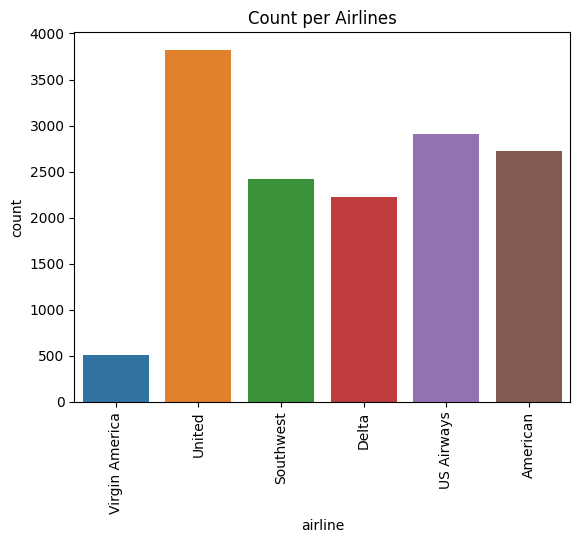

In [302]:
#Observation per airline
plot = sns.countplot(data=data,x='airline')
plot.set_title('Count per Airlines',)
plt.xticks(rotation=90)
plt.show()

* United has most number of data in the dataset followed by US Airways and American.

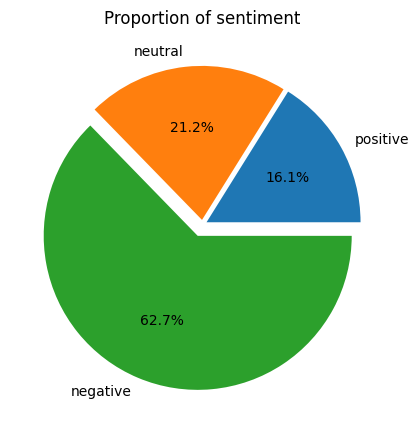

In [303]:
#Checking percentage of sentiment to get idea of data imbalance
x = data.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

* There are 3 values for sentiment - Negative, positive and neutral.
* There is more data for negative sentiment values. 

### Distribution of sentiment of tweets for each airline

In [304]:
#Checking actual value count of sentiment to get idea of data imbalance
a = data.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
a

airline_sentiment,negative,neutral,positive
airline,,,
American,1941,455,327
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


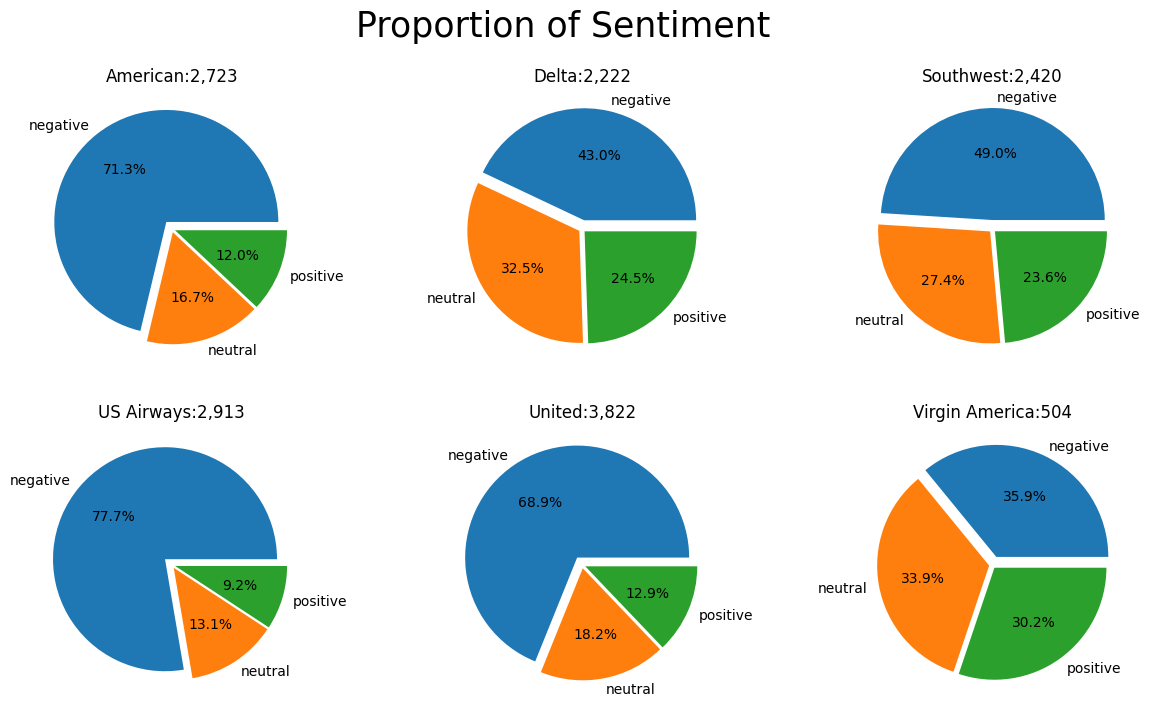

In [305]:
#Plotting the distribution of sentiment of tweets for each airline 
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = a.iloc[i]    
    ax.pie(x = temp, labels = temp.index, autopct = '%1.1f%%', explode = [0.08, 0.03, 0.03])
    ax.set_title(f"{a.index[i]}:{format(a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize = 25)    
plt.show()

* American and US Airways have most negative sentiment values followed by United.
* Delta, Southwest and Virgin America have balanced distribution of all 3 sentiments. 

### Reason for Negative sentiment

In [306]:
# Getting unique negative sentment reason
print(data.negativereason.unique())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [307]:
# Checking all negative sentiment count
data_neg = data[data.airline_sentiment == 'negative']
display(data_neg.shape, data_neg.head())

(9159, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


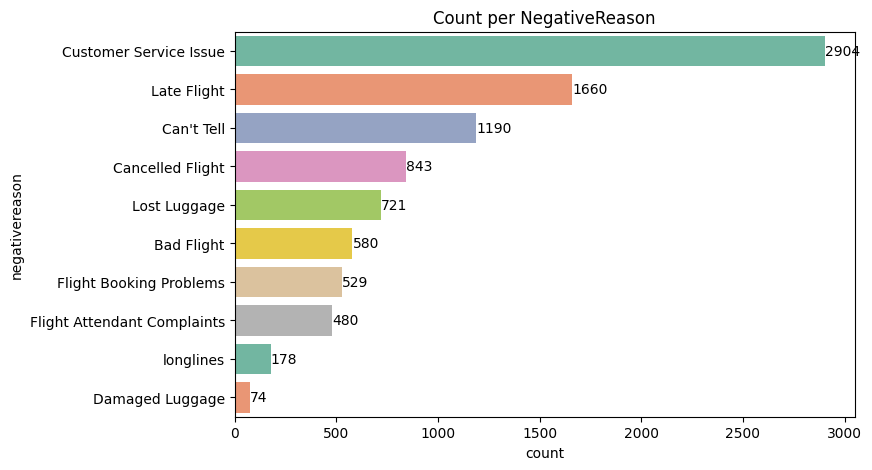

In [308]:
#plotting the distribution of all the negative reasons
plt.figure(figsize=(8,5))
ax = sns.countplot(data = data_neg, y = 'negativereason',
                   palette='Set2',
                   order = data_neg.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

- Customer Service Issue and Late Flight seems to be most prominent negative sentiment reason. 
- There are many Can't Tell for negative reason. After analysis, we can decide if we want to keep rows with Can't Tell data.

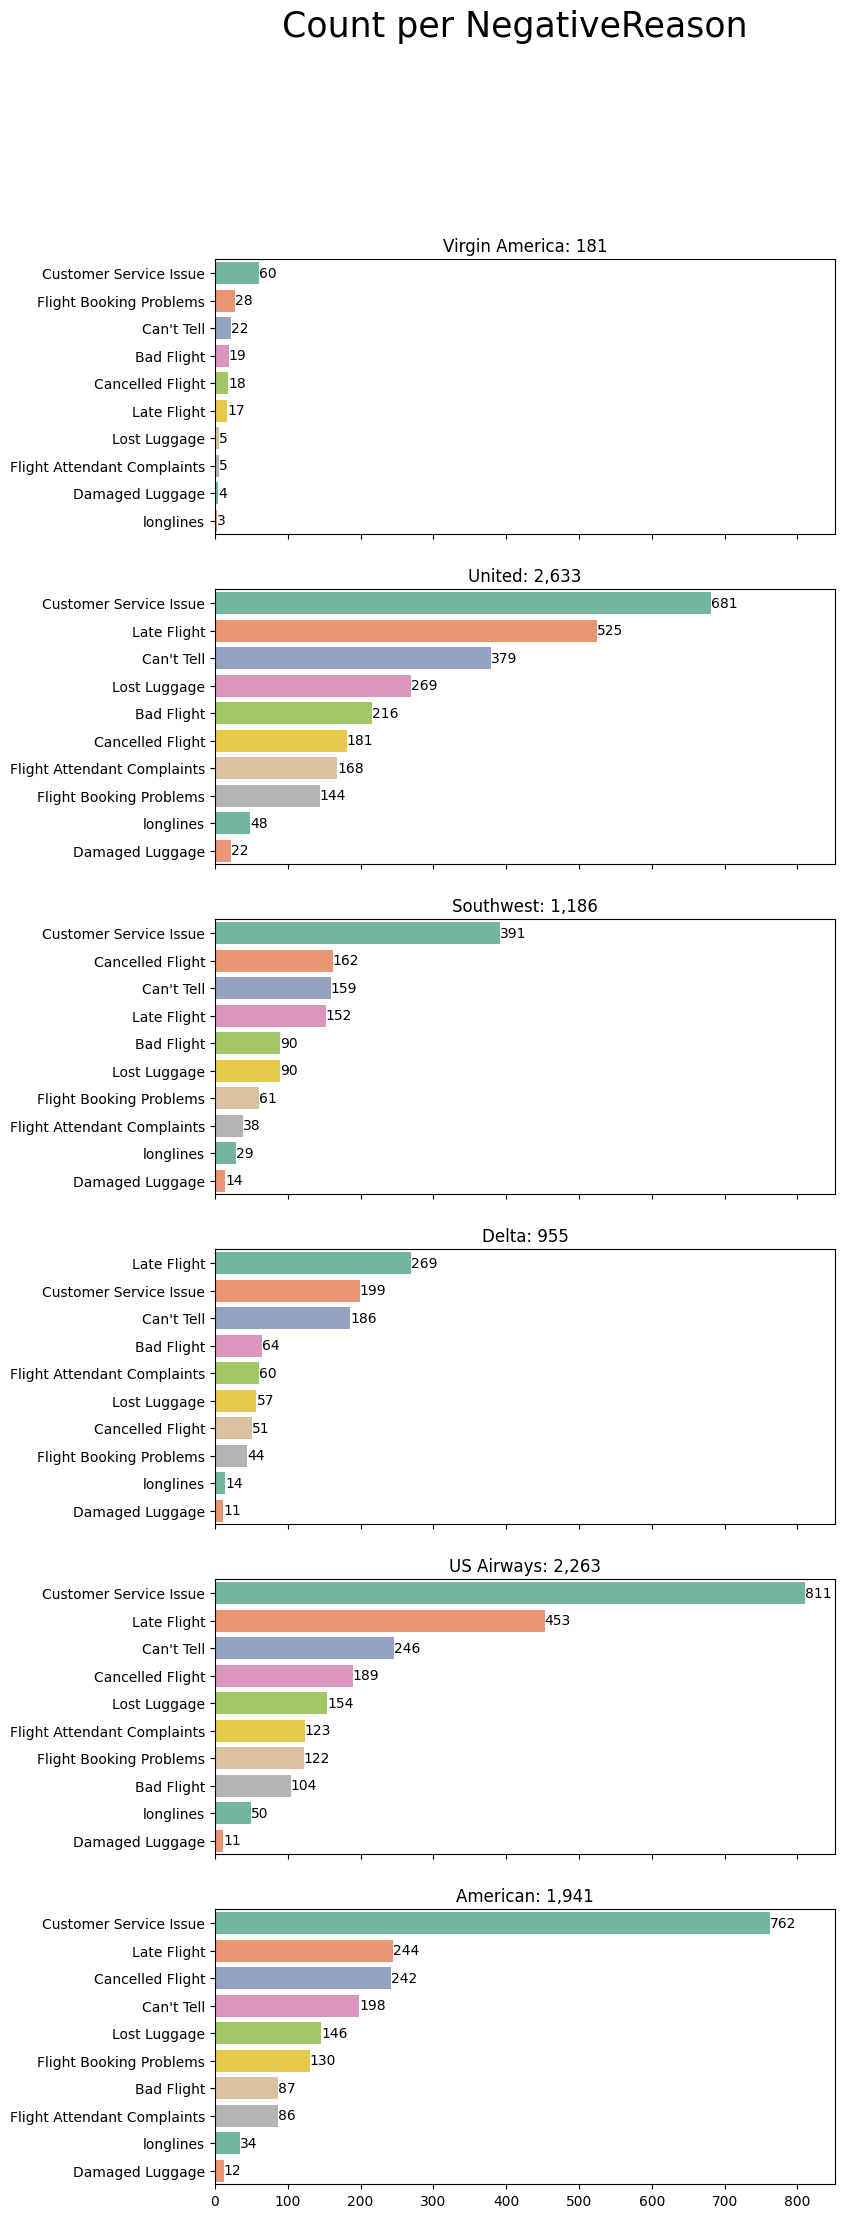

In [309]:
#plotting the distribution of all the negative reasons by each airline
fig, axes = plt.subplots(6, 1, figsize=(8, 25), sharex=True)
axes = axes.flatten()
names = data_neg['airline'].unique()

for name, n in zip(names, axes):
    ax = sns.countplot(data = data_neg[data_neg.airline==name], y = 'negativereason',
                       palette='Set2',
                       order = data_neg[data_neg.airline==name].negativereason.value_counts().index, ax = n)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"{name}: {format(len(data_neg[data_neg.airline==name]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("Count per NegativeReason", fontsize = 25)
plt.show()

- As expected based on earlier data (Plot - distribution of all the negative reasons) most of the airlines has Customer Service Issue as most prominent negative sentiment. This includes -  `Virgin America`, `United`, `Southwest`, `US Airways`, `American` airlines.
- `Delta airline` has more negative sentiments because of delayed flights. 

### Word cloud graph

In [310]:
from nltk.tokenize import word_tokenize

In [311]:
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# Words related the name of airlines are not relevant to the sentiment analysis
# appending the above names into the list of stop words.
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

In [312]:
# preprocessing before drawing wordcloud separating the sentiment.

positive = data[data.airline_sentiment == 'positive'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
positive = [" ".join(positive.values[i]) for i in range(len(positive))]
positive = [" ".join(positive)][0]

negative = data[data.airline_sentiment == 'negative'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
negative = [" ".join(negative.values[i]) for i in range(len(negative))]
negative = [" ".join(negative)][0]

neutral = data[data.airline_sentiment == 'neutral'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
neutral = [" ".join(neutral.values[i]) for i in range(len(neutral))]
neutral = [" ".join(neutral)][0]

print(len(positive), len(negative), len(neutral))

115546 590058 150800


#### Word cloud graph - positive sentiment

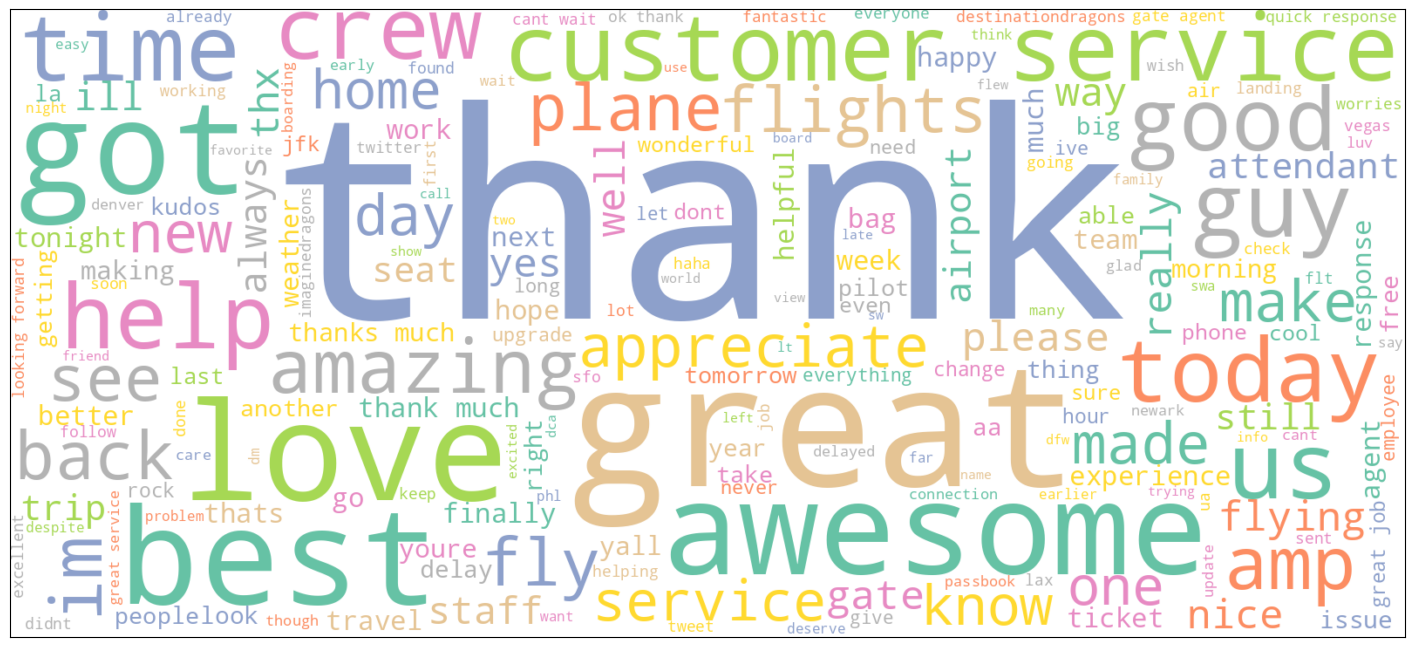

In [313]:
# Plotting word cloud for positive sentiments
plt.figure(figsize=(18,15))
wc_positive = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(positive)

plt.imshow(wc_positive,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

- From positive sentiments thank, great, awesome, best seems to be key words used when providing reviews. 

#### Word cloud graph - negative sentiment

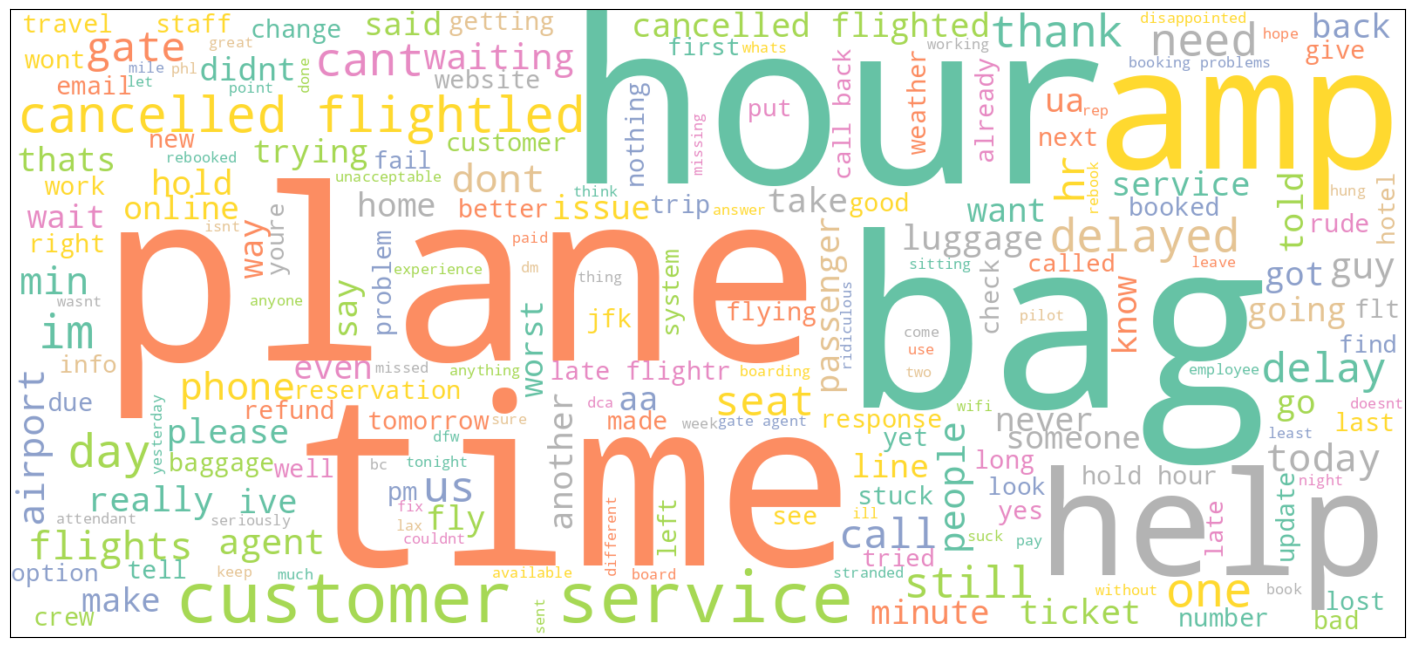

In [314]:
# Plotting word cloud for negative sentiments
plt.figure(figsize=(18,15))
wc_negative = WordCloud(min_font_size=3,max_words=200,width=1600,height=720,
                       colormap = 'Set2', background_color='white').generate(negative)

plt.imshow(wc_negative,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

- From negative sentiments bag, plane, time,hour,customer service seems to be key words used when providing reviews. 

### EDA Summary

* There are 14640 rows in dataset with 15 columns. 
* `negativereason`, `negativereason_confidence`,`airline_sentiment_gold`,`negativereason_gold`,`tweet_coord`,`tweet_location`,`user_timezone` columns seems to have missing values.
* United has most number of data in the dataset followed by US Airways and American.
* There are 3 values for sentiment - Negative, positive and neutral.
* There is more data for negative sentiment values. 
* American and US Airways have most negative sentiment values followed by United.Delta, Southwest and Virgin America have balanced distribution of all 3 sentiments. 
* Customer Service Issue and Late Flight seems to be most prominent negative sentiment reason.
* As expected based on earlier data (Plot - distribution of all the negative reasons) most of the airlines has Customer Service Issue as most prominent negative sentiment. This includes -  `Virgin America`, `United`, `Southwest`, `US Airways`, `American` airlines.
* `Delta airline` has more negative sentiments because of delayed flights. 
* Based on word cloud - From positive sentiments thank, great, awesome, best seems to be key words used when providing reviews. 
* Based on word cloud - From negative sentiments bag, plane, time,hour,customer service seems to be key words used when providing reviews. 

# **4.Dropping not required columns**

- `airline`, `airline_sentiment`, `negativereason`, `text` - These are the onlu columns from dataset which seems relevant for analyzing customer sentiment. Deleting all other columns from dataset for further analysis and modelling.

In [315]:
# dropping the redundant columns
data.drop(columns=["tweet_id","airline_sentiment_confidence","negativereason_confidence","airline_sentiment_gold","name","negativereason_gold","retweet_count",
                                                "tweet_coord","tweet_created","tweet_location","user_timezone"], inplace=True)

In [316]:
# saving the dataset after dropping column in new file for further processing. 
data.to_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_drop_column.csv',index=False)

In [317]:
#Load dataset from new csv for further processing
data_final = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_drop_column.csv')
# checking the shape of the data
print(f"There are {data_final.shape[0]} rows and {data_final.shape[1]} columns.")  # f-string

There are 14604 rows and 4 columns.


In [318]:
data_final.head(5)

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Bad Flight,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing about it


- After removing columns, dataset only contains 4 columns. Data has 14604 rows.

In [319]:
# After removing missing values for Mileage
data_final.isnull().sum().sort_values(ascending=False)

negativereason       5445
airline_sentiment       0
airline                 0
text                    0
dtype: int64

- There are 5445 rows where negativereason is not provided. But since airline_sentiment is available and there are no null vaues for airline_sentiment, not dropping rows where  negativereason is null. test may help to support analysis with negative sentiment values.

# **5. Data Pre-processing**

### **Text Pre-processing**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data


In [320]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.1 MB/s eta 0:00:00


In [322]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

In [323]:
                         
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data_final['text'] = data_final['text'].apply(lambda x: strip_html(x))

data_final.head()

<ipython-input-323-df397534c52c>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Bad Flight,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing about it


In [324]:

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data_final['text'] = data_final['text'].apply(lambda x: replace_contractions(x))

data_final.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,NaN,Virgin America,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,Bad Flight,Virgin America,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,Can't Tell,Virgin America,@VirginAmerica and it is a really big bad thing about it


In [325]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data_final['text'] = data_final['text'].apply(lambda x: remove_numbers(x))

data_final.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,NaN,Virgin America,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,Bad Flight,Virgin America,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,Can't Tell,Virgin America,@VirginAmerica and it is a really big bad thing about it


In [326]:
data_final['text'] = data_final.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [327]:
stopwords = stopwords.words('english')
# Aireline name doesn't seem to be key word for considering word cloud. Excluding this from list. 
customlist = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# Set custom stop-word's list 
stopwords = list(set(stopwords) - set(customlist))


In [328]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data_final['text'] = data_final.apply(lambda row: normalize(row['text']), axis=1)

data_final.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,virginamerica dhepburn say
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing


In [329]:
# saving the dataset after cleanup in new file for further processing. 
data_final.to_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_data_cleanup.csv',index=False)

In [330]:
#Load dataset from new csv for further processing
data_for_model = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_data_cleanup.csv')
# checking the shape of the data
print(f"There are {data_for_model.shape[0]} rows and {data_for_model.shape[1]} columns.")  # f-string

There are 14604 rows and 4 columns.


In [331]:
data_for_model.head(5)

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,virginamerica dhepburn say
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing


# **6. Model Building - Supervised Learning for Sentiment Analysis**

In [2]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, result)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

## Bag of Words (CountVectorizer)
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.


In [333]:
# Clearing backend

backend.clear_session()
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [334]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 100 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features = 1000)  

data_features = Count_vec.fit_transform(data_for_model['text'])

# Convert the data features to array
data_features = data_features.toarray()                      

In [335]:
# Shape of the feature vector
data_features.shape       

(14604, 1000)

In [336]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(data_features, data_for_model['airline_sentiment'], test_size=0.2, random_state=42)

In [337]:
# Using Random Forest to build model for the classification of sentiments.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, data_for_model['airline_sentiment'], cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6785114874339337


### **Optimizing the parameter**

 - Number of trees in the random forest model(n_estimators)

In [338]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [339]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

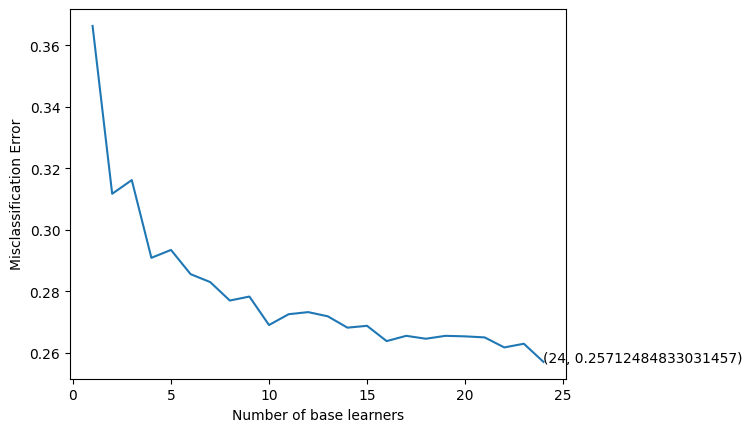

In [340]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- Misclassification errors are reducing with increase in base learner. 

In [341]:
# Training the best model and calculating accuracy on test data .
clf_BOW = RandomForestClassifier(n_estimators = optimal_learners)
clf_BOW.fit(X_train, y_train)
clf_BOW.score(X_test, y_test)

0.7576172543649435

In [343]:
result_BOW =  clf_BOW.predict(X_test)    

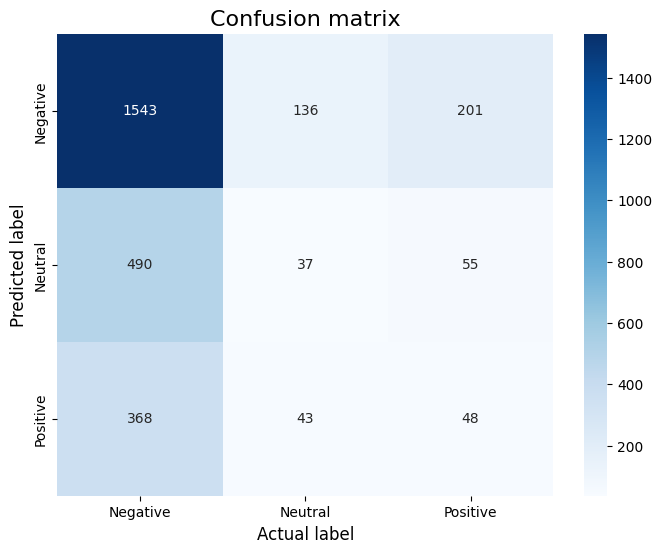

In [344]:
plot_confusion_matrix(clf_BOW, X_test, y_test)

- Based on confusion metrics, true Negatives are well identified. Which means model is able to identify negative sentiment. But at the same time there are many false positives. 

### Word Cloud of top 40 important features

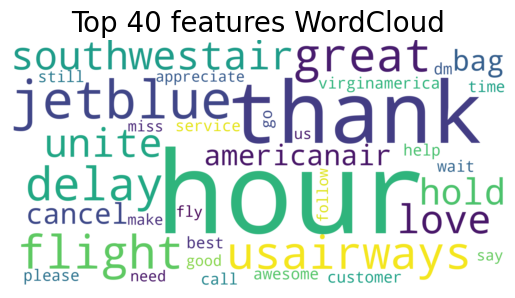

In [345]:
all_features = Count_vec.get_feature_names_out()            #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_BOW.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- hour, thanks, great, delay seems to be most prominent words from top 40.

## TF-IDF

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [346]:
# Clearing backend
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [347]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 2000)

data_features_TF_IDF = tfidf_vect.fit_transform(data_for_model['text'])

data_features_TF_IDF = data_features_TF_IDF.toarray()

# Feature shape
data_features_TF_IDF.shape     

(14604, 2000)

In [348]:
X = data_features_TF_IDF

y = data_for_model['airline_sentiment']

In [349]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [350]:
# Using Random Forest to build model for the classification of sentiments.
# Also calculating the cross validation score.

from sklearn.model_selection import cross_val_score

model_forest_TF_IDF = RandomForestClassifier(n_estimators=10, n_jobs=4)

model_forest_TF_IDF = model_forest_TF_IDF.fit(X_train, y_train)

print(model_forest_TF_IDF)

print(np.mean(cross_val_score(model_forest_TF_IDF, data_features_TF_IDF, data_for_model['airline_sentiment'], cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6763891377038264


### **Optimizing the parameter**

 - Number of trees in the random forest model(n_estimators)

In [352]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [353]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

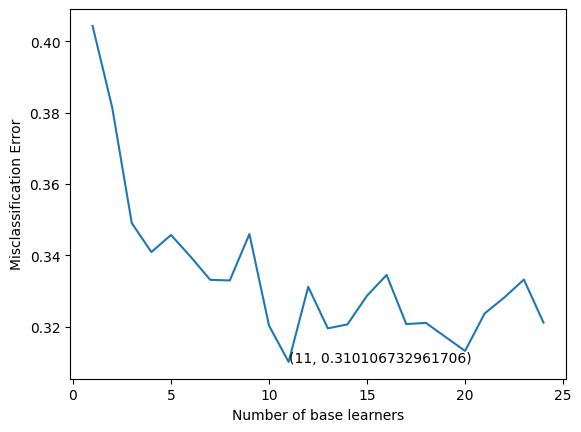

In [354]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [355]:
# Training the best model and calculating error on test data .
clf_model_TF_IDF = RandomForestClassifier(n_estimators = optimal_learners)
clf_model_TF_IDF.fit(X_train, y_train)
clf_model_TF_IDF.score(X_test, y_test)

0.7730229373502225

In [358]:
result_TF_IDF = clf_model_TF_IDF.predict(X_test)

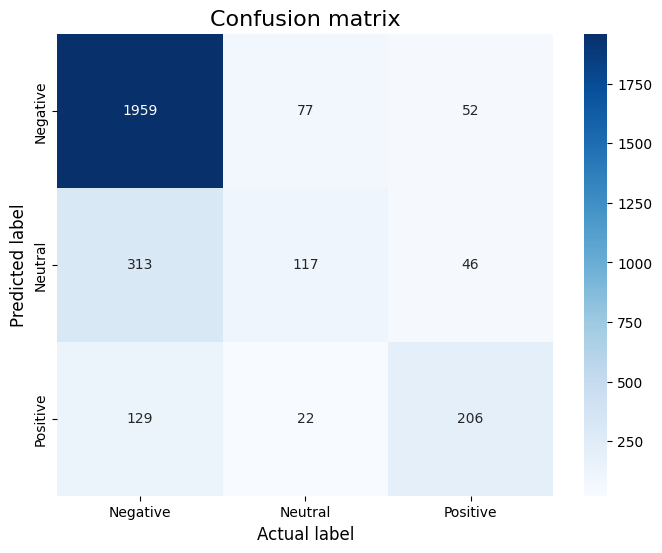

In [357]:
plot_confusion_matrix(clf_model_TF_IDF, X_test, y_test)

### Word Cloud of top 40 important features

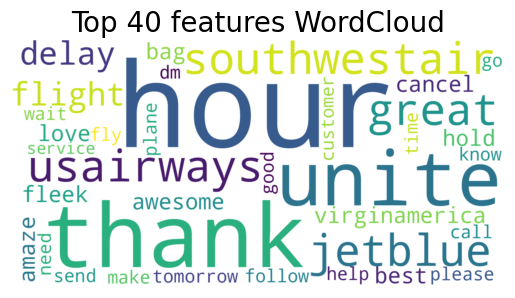

In [359]:
all_features = tfidf_vect.get_feature_names_out()            #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_model_TF_IDF.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

- hour, thank, great, delay seems to be most prominent words from top 40.

##Comparing the scores of Supervised Learning methods: Count Vectorizer and TF-IDF

In [360]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),
#Count Vectorizer model predicted labels(count_vectorizer_predicted)

df = pd.DataFrame(y_test.tolist(), columns = ['y_test'])

df['count_vectorizer_predicted'] = result_BOW

df['tf_idf_predicted'] = result_TF_IDF

df.head(20)

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,neutral,negative
1,negative,negative,negative
2,positive,negative,negative
3,negative,negative,negative
4,negative,negative,negative
5,negative,negative,negative
6,negative,positive,negative
7,negative,negative,negative
8,positive,negative,positive
9,neutral,negative,negative


* **TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# **7. **Sequential model - LSTM****

Sequential models is a common name for Neural Network architectures, that have units with memory. Here we shall be using LSTM, which is a type of Recurrent Neural Network layer as the memory units. 

A typical LSTM unit is made up of a cell, an input gate, an output gate, and a forget gate. The cell is responsible for "remembering" values over extended periods of time and "forgetting" certain values when the context changes. This allows LSTM to maintain "memory." Each of the three gates can be viewed as a Fully-Connected Artificial Neural Network, or Multi-Layer Perceptrons. They calculate an activation (using an activation function) of a weighted sum. Additionally, the input and output vectors are accompanied by a context vector that contains information about the summary of the text it has processed thus far.

Intuitively, the gates regulate the flow of values that pass through the connections of the LSTM, which is why they are referred to as "gates." They tend to output values between '1' and '0', where '1' is multiplied with the context and input vectors. The values that are multiplied with zero are forgotten and those multiplied with 1 are remembered.

**Components of the LSTM**

The LSTM cell contains the following components:

- Forget Gate “f” ( a neural network with sigmoid)
- Candidate layer “C"(a NN with Tanh)
- Input Gate “I” ( a NN with sigmoid )
- Output Gate “O”( a NN with sigmoid)
- Hidden state “H” ( a vector )
- Memory state “C” ( a vector)

Inputs to the LSTM cell at any step are Xt (current input) , Ht-1 (previous hidden state ) and Ct-1 (previous memory state).

Outputs from the LSTM cell are Ht (current hidden state ) and Ct (current memory state)

In [361]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [23]:
# Used to create the Sequential model
from keras.models import Sequential

# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [363]:
#Load dataset from new csv for further processing
data_for_LSTM = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_data_cleanup.csv')
# checking the shape of the data
print(f"There are {data_for_LSTM.shape[0]} rows and {data_for_LSTM.shape[1]} columns.")  # f-string

There are 14604 rows and 4 columns.


In [364]:
data_for_LSTM.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,virginamerica dhepburn say
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing


### **Tokenizing and converting the sentiments into numerical vectors**

In [365]:
# Creating the tokenizer with 1000 vocab size
tokenizer = Tokenizer(num_words = 1000, split = ' ') 

tokenizer.fit_on_texts(data_for_LSTM['text'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(data_for_LSTM['text'].values)

# Padding the sequences
X = pad_sequences(X)

### **Model Building**

In [366]:
model_LSTM = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 1000 here.
# Adding Input Embedding Layer
model_LSTM.add(Embedding(1000, 120, input_length = X.shape[1]))
model_LSTM.add(SpatialDropout1D(0.4))

# Adding Hidden Layer 1 - LSTM Layer
model_LSTM.add(LSTM(120,dropout = 0.3, recurrent_dropout = 0.3))

model_LSTM.add(Dense(256,activation='relu'))

# Adding Output Layer
model_LSTM.add(Dense(3, activation = 'softmax'))

# compile the model
model_LSTM.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [367]:
print(model_LSTM.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 120)           120000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 19, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 120)               115680    
                                                                 
 dense (Dense)               (None, 256)               30976     
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 267,427
Trainable params: 267,427
Non-trainable params: 0
__________________________________________________

**Splitting the Data**

In [369]:
# creating the target feature
y = pd.get_dummies(data_for_LSTM['airline_sentiment'])

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [370]:
X_train.shape, X_test.shape

((11683, 19), (2921, 19))

**Training Model**

In [371]:
# fitting the model on the training data with 10 epochs
his = model_LSTM.fit(X_train, 
                    y_train,
                    validation_split=0.2, 
                    batch_size=32,
                    epochs=10, 
                    verbose=1)

Epoch 1/10
293/293 [==============================] - 28s 80ms/step - loss: 0.7052 - accuracy: 0.7065 - val_loss: 0.5994 - val_accuracy: 0.7638
Epoch 2/10
293/293 [==============================] - 24s 83ms/step - loss: 0.5406 - accuracy: 0.7785 - val_loss: 0.5795 - val_accuracy: 0.7831
Epoch 3/10
293/293 [==============================] - 21s 72ms/step - loss: 0.4975 - accuracy: 0.8000 - val_loss: 0.5623 - val_accuracy: 0.7783
Epoch 4/10
293/293 [==============================] - 24s 81ms/step - loss: 0.4669 - accuracy: 0.8109 - val_loss: 0.5724 - val_accuracy: 0.7745
Epoch 5/10
293/293 [==============================] - 22s 74ms/step - loss: 0.4536 - accuracy: 0.8125 - val_loss: 0.5704 - val_accuracy: 0.7775
Epoch 6/10
293/293 [==============================] - 22s 74ms/step - loss: 0.4330 - accuracy: 0.8232 - val_loss: 0.5753 - val_accuracy: 0.7724
Epoch 7/10
293/293 [==============================] - 23s 79ms/step - loss: 0.4128 - accuracy: 0.8307 - val_loss: 0.6264 - val_accuracy:

**Plotting Model**

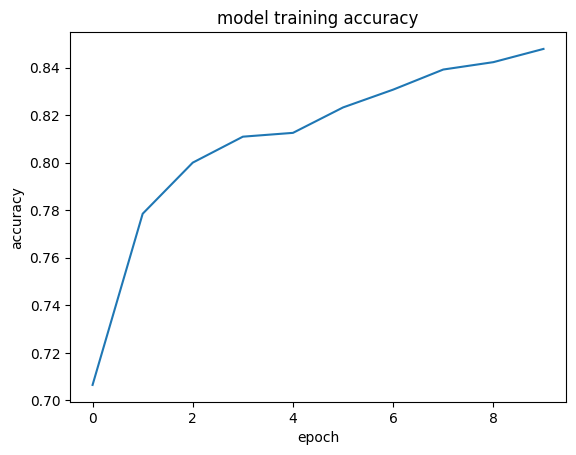

In [372]:
# accessing the accuracy from the his variable
plt.plot(his.history['accuracy'])
# setting the title 
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

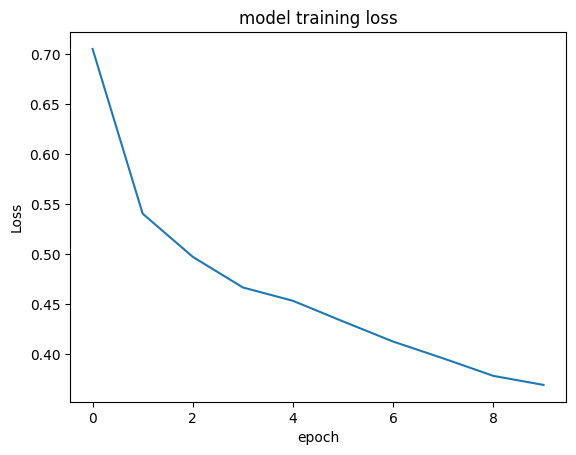

In [373]:
# accessing the loss from the his variable
plt.plot(his.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

**Evaluating the model on the test data**

In [374]:
model_LSTM.evaluate(X_test,y_test)

92/92 [==============================] - 1s 9ms/step - loss: 0.6217 - accuracy: 0.7645


[0.6216835975646973, 0.7644641995429993]

- With LSTM test has 76% accuracy score. 

In [375]:
result_LSTM = model_LSTM.predict(X_test)

92/92 [==============================] - 2s 15ms/step


In [376]:
result_LSTM

array([[4.9480698e-03, 9.5145887e-01, 4.3592960e-02],
       [1.6393222e-01, 8.1036937e-01, 2.5698496e-02],
       [9.8023832e-01, 5.7232985e-03, 1.4038413e-02],
       ...,
       [1.0420138e-01, 5.0237129e-04, 8.9529622e-01],
       [9.9960095e-01, 3.6881171e-04, 3.0286008e-05],
       [6.4593828e-01, 3.0478382e-01, 4.9277894e-02]], dtype=float32)

# Model Performance Comparison

In [85]:
#Reading data from excel and copying in another dataframe
modelComparison = pd.read_csv("/content/drive/My Drive/Python Learning/Projects/Project9/modelcomparison.csv")

In [86]:
modelComparison.head(5)

,Model,Test Accuracy
0,Model 1 - Bag Of Words - Random Forest,0.757
1,Model 2 - TF-IDF - Random Forest,0.773
2,Model 3 - LSTM,0.760


- Based on this comparision, model with TF-IDF and Random forest seems to perform better then other models.

# **8. Unsupervised Learning methods for Sentiment Analysis**

In [63]:
# Unsupervised learning models

# Install vader sentiment package
!pip install vaderSentiment 

# Install textblob package
!pip install textblob   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## **6.1 VADER**
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a **lexicon** and **rule-based** sentiment analysis library or tool. It not only provides us  the Positivity and Negativity score of a sentiment, but also tells us the degree of positivity or negativity of it.

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

In [66]:
#Load dataset from new csv for further processing
data_for_VADER = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_data_cleanup.csv')
# checking the shape of the data
print(f"There are {data_for_VADER.shape[0]} rows and {data_for_VADER.shape[1]} columns.")  # f-string

There are 14604 rows and 4 columns.


In [67]:
data_new = data_for_VADER.copy()   # make a copy of dataframe and do unsupervised operations on that dataframe

In [68]:
# Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda text: sentiment.polarity_scores(text))

data_new.head()

,airline_sentiment,negativereason,airline,text,scores
0,neutral,NaN,Virgin America,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}"
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}"


In [69]:
# Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,airline_sentiment,negativereason,airline,text,scores,compound
0,neutral,NaN,Virgin America,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829


In [70]:
# Classify the class of the review by keeping threshold on the compund score

data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,airline_sentiment,negativereason,airline,text,scores,compound,comp_score
0,neutral,NaN,Virgin America,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,1
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306,0
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829,0


In [71]:
data_for_VADER["VADER_pred"] = data_new['comp_score'].tolist()
data_for_VADER.head()

,airline_sentiment,negativereason,airline,text,VADER_pred
0,neutral,NaN,Virgin America,virginamerica dhepburn say,1
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,1
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,1
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,0


In [72]:
# replacing values
data_for_VADER['sentiment'] = data_for_VADER['airline_sentiment'].replace(['negative', 'positive','neutral'],[0, 1,2])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.44      0.59      9159
           1       0.23      0.96      0.37      2354
           2       0.00      0.00      0.00      3091

    accuracy                           0.43     14604
   macro avg       0.37      0.47      0.32     14604
weighted avg       0.60      0.43      0.43     14604



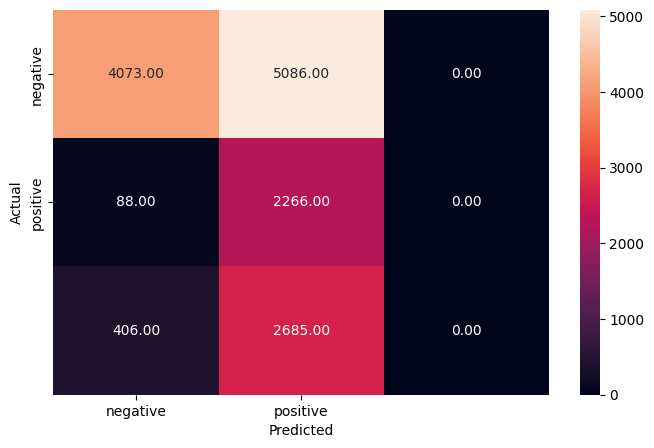

In [73]:
# Calculate the accuracy of the Vader Sentiment Analysis
data_for_VADER["sentiment"] = data_for_VADER["sentiment"].astype(int)   #convert the sentiment column values into int data type

data_for_VADER["VADER_pred"] = data_for_VADER["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type

metrics_score(data_for_VADER["sentiment"], data_for_VADER["VADER_pred"])

## **6.2 TextBlob**

In [74]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [75]:
from textblob import TextBlob

In [76]:
#Load dataset from new csv for further processing
data_for_TextBlob = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project9/Tweets_after_data_cleanup.csv')
# checking the shape of the data
print(f"There are {data_for_TextBlob.shape[0]} rows and {data_for_TextBlob.shape[1]} columns.")  # f-string

There are 14604 rows and 4 columns.


In [77]:
data_new_textBlob = data_for_TextBlob.copy()      # make a copy of dataframe and do unsupervised operations on that dataframe

In [78]:
# Calculate the polarity score of the reviews
data_new_textBlob['polarity']  = data_new_textBlob['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new_textBlob.head()

,airline_sentiment,negativereason,airline,text,polarity
0,neutral,NaN,Virgin America,virginamerica dhepburn say,0.00000
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,0.00000
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,-0.31250
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0.00625
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,-0.35000


In [79]:
# Classify the class of the review by keeping threshold on the polarity score
data_new_textBlob['polarity_score'] = data_new_textBlob['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new_textBlob.head()

,airline_sentiment,negativereason,airline,text,polarity,polarity_score
0,neutral,NaN,Virgin America,virginamerica dhepburn say,0.00000,1
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,0.00000,1
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,-0.31250,0
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0.00625,1
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,-0.35000,0


In [80]:
data_new_textBlob["Text_Blob_pred"] = data_new_textBlob['polarity_score'].tolist()
data_new_textBlob.head()

,airline_sentiment,negativereason,airline,text,polarity,polarity_score,Text_Blob_pred
0,neutral,NaN,Virgin America,virginamerica dhepburn say,0.00000,1,1
1,positive,NaN,Virgin America,virginamerica plus add commercials experience tacky,0.00000,1,1
2,neutral,NaN,Virgin America,virginamerica today must mean need take another trip,-0.31250,0,0
3,negative,Bad Flight,Virgin America,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0.00625,1,1
4,negative,Can't Tell,Virgin America,virginamerica really big bad thing,-0.35000,0,0


In [81]:
# replacing values
data_new_textBlob['sentiment'] = data_new_textBlob['airline_sentiment'].replace(['negative', 'positive','neutral'],[0, 1,2])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.29      0.43      9159
           1       0.19      0.96      0.32      2354
           2       0.00      0.00      0.00      3091

    accuracy                           0.34     14604
   macro avg       0.36      0.42      0.25     14604
weighted avg       0.58      0.34      0.32     14604



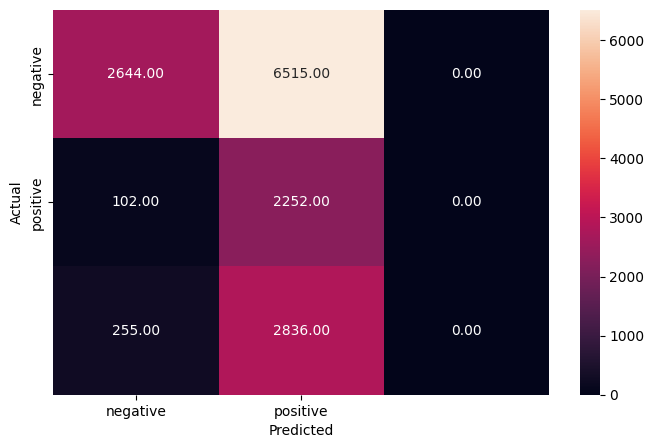

In [82]:
# Calculate the accuracy of the Vader Sentiment Analysis
data_new_textBlob["sentiment"] = data_new_textBlob["sentiment"].astype(int)  #convert the sentiment column values into int data type

data_new_textBlob["Text_Blob_pred"] = data_new_textBlob["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type

metrics_score(data_new_textBlob["sentiment"], data_new_textBlob["Text_Blob_pred"])

- **Here, Text Blob works better than Vader because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage bold text.**

# **9. Summary**

* From positive sentiments thank, great, awesome, best seems to be key words used when providing reviews. From negative sentiments bag, plane, time,hour,customer service seems to be key words used when providing reviews. 

* `Delta airline` has more negative sentiments because of delayed flights. The airline can work on root cause to understand what can be done to avoid delay issues.  

* Most of the airlines have issues with Customer Service. This is where airlines may need to focus more to understand what is getting discussed between customer and customer service representative. This can also be done using text based analysis by capturning both voice and chat conversation. This can help airlines train customer service agents to handle customer more effectively and avoid negative reviews. 

* For sentiment analysis, we used supervised learning approaches such as  TF-IDF, Bag-of-Words and LSTM. We also used two unsupervised learning techniques, TextBlob and Vader. 

* In supervised learning techniques, TF-IDF outperforms BoW since it not only considers the frequency of words in the corpus but also considers their importance.

* TF-IDF using Ransdomforest classifier produced close to 78% accuracy on test data which is more than BOW. 

* Textblob performed better than Vader among the unsupervised learning algorithms as our dataset comprises movie reviews which tend to use more formal language.